In [1]:
import numpy as np
from keras.utils import to_categorical
from keras.layers import *
from keras.models import Sequential
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


MNIST is acronym that stand for Modified National Institute of Standards and Technology. It is a dataset of 70,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Shape of your training set and testing set

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Sample image visualising

label of this image is:7


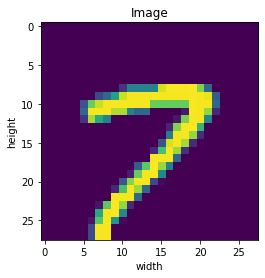

In [4]:
plt.imshow(X_train[123])
plt.xlabel('width')
plt.ylabel('height')
plt.title('Image')
print('label of this image is:{}'.format(y_train[123]))

In [5]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

Here we have to use to_categorical because we need to convert to one_hot vector.
Don't worry if haven't heard this word you can search it in google. it more lengthy to explain it here.

In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Creating a model sequence

In [7]:
model = Sequential()

W0814 09:31:51.184687 18544 deprecation_wrapper.py:119] From C:\Users\krishna rohit\Anaconda3\envs\machine-learning\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



Adding layers to this model sequence

In [8]:
#1-layer convolution of filter/kernel size (3, 3) with activation function 'relu' with input_shape (28, 28, 1)
model.add(Conv2D(6, kernel_size = (5, 5), strides = (1, 1), padding = 'same', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same'))
#Activation Layer
model.add(Activation('relu'))
#2-layer convolution of filter/kernel size (3, 3) with activation function 'relu'
model.add(Conv2D(16, kernel_size = (5, 5), strides = (1, 1), padding = 'same'))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2), padding = 'same'))
#Activation Layer
model.add(Activation('relu'))
#flattening and applying dense
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

W0814 09:31:55.404460 18544 deprecation_wrapper.py:119] From C:\Users\krishna rohit\Anaconda3\envs\machine-learning\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0814 09:31:55.414585 18544 deprecation_wrapper.py:119] From C:\Users\krishna rohit\Anaconda3\envs\machine-learning\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0814 09:31:55.549794 18544 deprecation_wrapper.py:119] From C:\Users\krishna rohit\Anaconda3\envs\machine-learning\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



Here call function compile with parameters given below

In [9]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

W0814 09:31:59.274648 18544 deprecation_wrapper.py:119] From C:\Users\krishna rohit\Anaconda3\envs\machine-learning\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0814 09:31:59.402729 18544 deprecation_wrapper.py:119] From C:\Users\krishna rohit\Anaconda3\envs\machine-learning\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



model has a function fit where it is used to train created mdoel with given parameters

In [10]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4, batch_size = 128, verbose = 1)

W0814 09:32:03.382187 18544 deprecation.py:323] From C:\Users\krishna rohit\Anaconda3\envs\machine-learning\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0814 09:32:03.699380 18544 deprecation_wrapper.py:119] From C:\Users\krishna rohit\Anaconda3\envs\machine-learning\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 89s 1ms/step - loss: 4.6753 - acc: 0.6812 - val_loss: 0.1165 - val_acc: 0.9624
Epoch 2/4
60000/60000 [==============================] - 95s 2ms/step - loss: 0.0905 - acc: 0.9725 - val_loss: 0.0757 - val_acc: 0.9751
Epoch 3/4
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0504 - acc: 0.9839 - val_loss: 0.0638 - val_acc: 0.9816
Epoch 4/4
60000/60000 [==============================] - 108s 2ms/step - loss: 0.0360 - acc: 0.9881 - val_loss: 0.0637 - val_acc: 0.9834
